<a href="https://colab.research.google.com/github/achmadbauravindah/ImageClassification-TransferLearning-ChessmanImagesDataset/blob/main/ImageClassification_TransferLearning_ChessmanImagesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import ResNet50


# Plot images
import matplotlib.pyplot as plt
from cv2 import imread, imshow
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Preprocessing image data
import os

In [2]:
_ = ! git clone https://github.com/achmadbauravindah/ravin_kaggle_credential.git # get credential from kaggle
_ = ! pip install kaggle # install kaggle on drevice
_ = ! mkdir ~/.kaggle # make hidden folder .kaggle to configure credential
_ = ! cp ravin_kaggle_credential/kaggle.json ~/.kaggle/ # copy credential from github to .kaggle folder
_ = ! chmod 600 ~/.kaggle/kaggle.json # change access
_ = ! kaggle datasets download chessman-images-dataset # which dataset to download
_ = ! unzip chessman-images-dataset # unzip if data zipped

In [3]:
image_dir = os.path.join(os.getcwd() + '/Chessman_Images_Dataset')

In [4]:
# Configuration of Data Generator for Preprocess Image
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             zoom_range=0.2,
                             shear_range=0.2,
                             fill_mode = 'nearest',
                             validation_split=0.1) # set validation split

In [5]:
# Split data with subset train and validation
train_generator = datagen.flow_from_directory(image_dir,
                                              target_size=(200, 200),
                                              batch_size=8,
                                              class_mode='categorical',
                                              subset='training') # set as training data

val_generator = datagen.flow_from_directory(image_dir, # same directory as training data
                                            target_size=(200, 200),
                                            batch_size=16,
                                            class_mode='categorical',
                                            subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


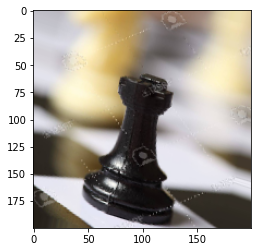

In [6]:
# Sample image
sample_image_train = next(train_generator)
plt.imshow(sample_image_train[0][0])

In [7]:
# Create Model Transfer Learning from "ResNet152V2" dengan refrensi bobot "imagenet"
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(200, 200, 3))),
    Dropout(0.4),
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')  
])
# Set layer transfer learning is not trainable
model.layers[0].trainable = False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 109,845,254
Trainable params: 51,513,606
N

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
# Akurasi yang didapat kurang bagus sehingga membutuhkan lebih banyak epoch
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=5,
                    verbose=2)

Epoch 1/5
63/63 - 31s - loss: 8.5230 - accuracy: 0.5230 - val_loss: 3.4995 - val_accuracy: 0.6154 - 31s/epoch - 496ms/step
Epoch 2/5
63/63 - 13s - loss: 2.7503 - accuracy: 0.7034 - val_loss: 3.0993 - val_accuracy: 0.5962 - 13s/epoch - 208ms/step
Epoch 3/5
63/63 - 13s - loss: 1.7609 - accuracy: 0.7735 - val_loss: 1.1068 - val_accuracy: 0.7692 - 13s/epoch - 209ms/step
Epoch 4/5
63/63 - 14s - loss: 1.1505 - accuracy: 0.8297 - val_loss: 0.8466 - val_accuracy: 0.8462 - 14s/epoch - 227ms/step
Epoch 5/5
63/63 - 13s - loss: 0.8376 - accuracy: 0.8597 - val_loss: 2.1397 - val_accuracy: 0.6731 - 13s/epoch - 210ms/step


In [40]:
# Get 1 Image from validation split
image_to_predict = next(val_generator)[0][0]

(200, 200, 3)

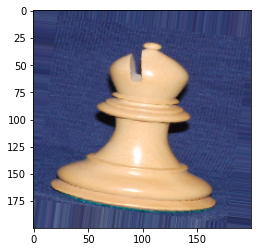

In [41]:
# Show image
plt.imshow(image_to_predict)
image_to_predict.shape

In [42]:
image_to_predict = image_to_predict.reshape(-1, 200, 200, 3)

In [43]:
# Prediction Result
predicted_image = model.predict(image_to_predict)
classes = ['Bishop', 'King', 'Knigt', 'Pawn', 'Quenn', 'Rook']
print("Image successfully predicted on class: " + classes[predicted_image.argmax()])

Image successfully predicted on class: Bishop
